## Simple Linear Regression

In this regression task we will predict the marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


In [3]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported")

data.head(10)

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


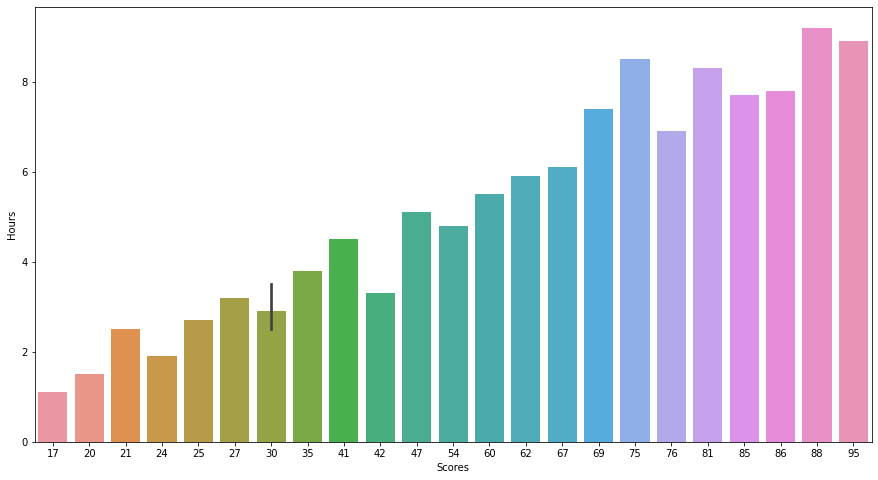

In [7]:
plt.figure(figsize =(15, 8))
sns.barplot(y ='Hours',x ='Scores', data = data)

As we see in the above plot as the number of hours increasing the scores on an individual also increaing


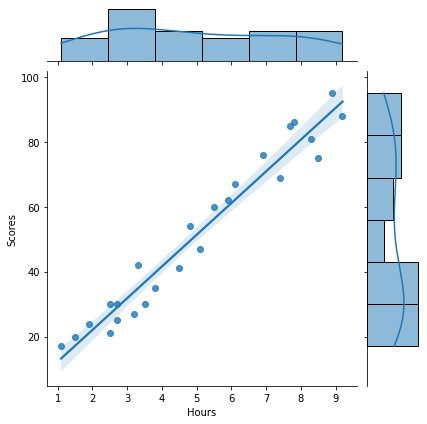

In [10]:
sns.jointplot(data = data, x = 'Hours',y = 'Scores', kind = 'reg')

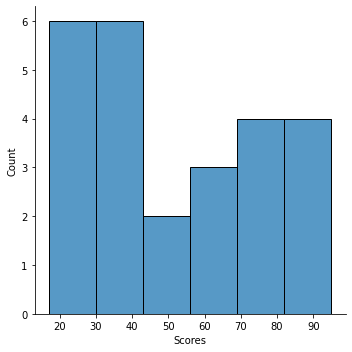

In [17]:
sns.displot(data, x = 'Scores')

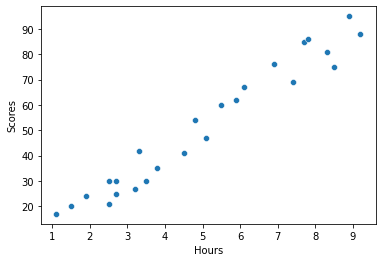

In [18]:
sns.scatterplot(data = data, x = 'Hours',y = 'Scores', )

In [36]:

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values


 the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [37]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

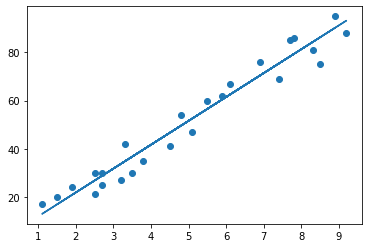

In [39]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X,y)
plt.plot(X, line);
plt.show()

In [42]:
print(X_test)
y_pred = regressor.predict(X_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [44]:
#comparing actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [47]:
# We can also test that with own data
hours = int(input(" Please Enter Number of Study Hours : \n "))
my_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))
percentage =  

 Please Enter Number of Study Hours : 
 8
No of Hours = 8
Predicted Score = 81.30341188657258


In [48]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
